
# Introduction to Dask

Dask is a flexible parallel computing library for analytics. It allows operations to be parallelized by breaking tasks into smaller chunks and then executing these tasks concurrently (in parallel). This parallel execution can happen on a single machine or across a cluster of machines. Dask provides dynamic task scheduling and parallel collections that extend the functionality of well-known Python libraries like NumPy, pandas, and scikit-learn.



# Setting up Dask

Before we dive into Dask's features, let's ensure it's installed.


In [15]:

# Importing required libraries for demonstration
import dask.array as da
import dask.dataframe as dd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
#Scenario: Analyzing Sales Data
#Imagine a retail company wants to analyze their sales data over the years, which is too large to fit into memory, to understand their sales trends, popular products, and customer behaviors.

In [17]:
# ---------------------------
# Step 1: Generating Sales Data (Simulation)
# ---------------------------

# Normally, you would load data from a database or CSV file, but for this example, we're generating a large dataset.

# Create a date range
date_rng = pd.date_range(start='2018-01-01', end='2021-12-31', freq='H')

# Simulate sales data
np.random.seed(0)
sales_data = pd.DataFrame(date_rng, columns=['date'])
sales_data['sales'] = np.random.randint(1, 100, size=(len(date_rng)))

# Now, let's assume this 'sales_data' dataframe is very large and doesn't fit into memory, which is where Dask comes in


# Dask DataFrames

Dask DataFrames are a large parallel DataFrame composed of many smaller pandas DataFrames. These smaller DataFrames are split along the index. Dask DataFrames provide a familiar API, similar to pandas, but can operate in parallel on datasets that don't fit into main memory.


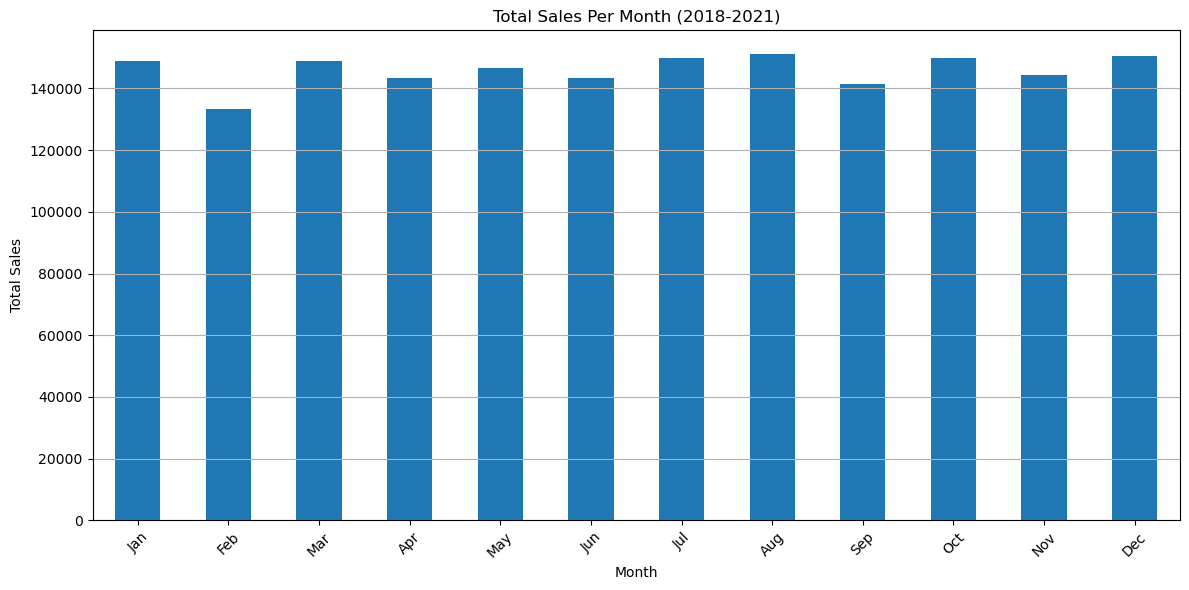

In [18]:
# ---------------------------
# Step 2: Dask for Large DataFrames
# ---------------------------

# Convert the pandas DataFrame to a Dask DataFrame
ddf = dd.from_pandas(sales_data, npartitions=10)  # you may choose the number of partitions based on your system

# Perform some operations with Dask - for example, calculate the total sales per month
monthly_sales = ddf.groupby(ddf['date'].dt.month).sales.sum()

# Compute the result using Dask
computed_monthly_sales = monthly_sales.compute()

# Visualize the total sales per month
plt.figure(figsize=(12, 6))
computed_monthly_sales.plot(kind='bar')
plt.title('Total Sales Per Month (2018-2021)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Dask Arrays

Dask arrays are a parallelized version of NumPy arrays. They support a large subset of the NumPy API by breaking up a large array into smaller chunks and then performing operations on these chunks in parallel. Let's see an example.


In [19]:
# ---------------------------
# Step 3: Using Dask Array for Calculations
# ---------------------------

# Let's say we want to analyze some aspect of our sales in a matrix format, or perform calculations like Fourier transforms.

# For the sake of an example, we're creating a Dask array from the sales data.
sales_array = da.from_array(sales_data['sales'].values, chunks=(1000))  # you might adjust chunks based on your data

# Perform an operation, like finding the mean
mean_sales = sales_array.mean()

# Compute the result
computed_mean_sales = mean_sales.compute()

# Print the result
print(f"Average sales from 2018 to 2021: {computed_mean_sales:.2f}")

Average sales from 2018 to 2021: 49.99



# Dask Bags

Dask bags, also known as dask.bag, are a parallelized version of Python lists. They're well-suited for working with semi-structured data, like text data, log files, or JSON blobs. Dask bags provide operations like map, filter, fold, and groupby, and they work lazily so that they can handle large datasets without any issues.


In [20]:

import dask.bag as db

# Creating a Dask Bag from a sequence
b = db.from_sequence([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], npartitions=2)

# Map and filter operations on the Dask Bag
result_bag = b.map(lambda x: x * 2).filter(lambda x: x > 10)
result_bag.compute()

# This example demonstrated how Dask can handle large datasets efficiently, perform group operations, and do parallel computations.
# Such analysis helps the retail company in understanding their sales trends and making informed business decisions.

[12, 14, 16, 18, 20]


# Conclusion

Dask provides a powerful framework for parallel and distributed computing in Python, seamlessly integrating with popular Python libraries like NumPy and pandas. Whether you're working on a single machine with data that doesn't fit in memory or scaling out computations to a cluster, Dask provides the tools to get the job done efficiently.
